In [164]:
def retrieve_census(year=2010):
    
    import csv
    import pandas as pd

    def population_by_year(year=2010, census=None):

        if census is None:
            return None

        key = 'POPEST{}_CIV'.format(year)

        states = {}

        for row in census:
            state = row['STATE']
            
            if state not in states:
                states[state] = {'name': row['NAME'], 'id': int(row['STATE']), 'population': 0}
            
            states[state]['population'] += int(row[key])

        return list(states.values())
        
    with open('sc-est2017-agesex-civ.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)

        # 999 means total of all age group
        census = list(filter(lambda x: x['NAME'] != 'United States' and x['AGE'] != '999', reader))
    
    return population_by_year(2010, census)

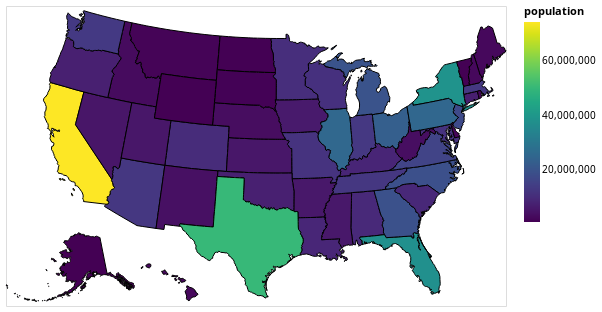

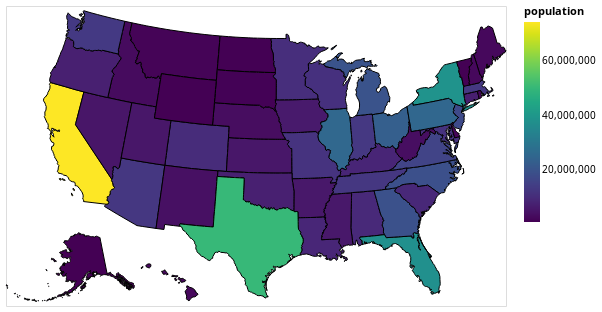

In [165]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

states = alt.topo_feature(data.us_10m.url, 'states')
source = alt.Data(values=retrieve_census())

selector = alt.selection_single(on='mouseover', nearest=True)
brush = alt.selection_interval()

alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='black'
).encode(
#     alt.Color('population', type='quantitative', 
#               scale=alt.Scale(scheme='greys'),
#               title='Population by State'),
    color='population:Q',
    tooltip='name:N'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['population'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
).add_selection(
    selector
)

In [100]:
source

Data({
  values: [{'name': 'Alabama', 'id': 1, 'population': 9539064}, {'name': 'Alaska', 'id': 2, 'population': 1383552}, {'name': 'Arizona', 'id': 4, 'population': 12770166}, {'name': 'Arkansas', 'id': 5, 'population': 5829140}, {'name': 'California', 'id': 6, 'population': 74353114}, {'name': 'Colorado', 'id': 8, 'population': 10029304}, {'name': 'Connecticut', 'id': 9, 'population': 7143286}, {'name': 'Delaware', 'id': 10, 'population': 1791626}, {'name': 'District of Columbia', 'id': 11, 'population': 1203836}, {'name': 'Florida', 'id': 12, 'population': 37548014}, {'name': 'Georgia', 'id': 13, 'population': 19308558}, {'name': 'Hawaii', 'id': 15, 'population': 2648878}, {'name': 'Idaho', 'id': 16, 'population': 3132506}, {'name': 'Illinois', 'id': 17, 'population': 25614224}, {'name': 'Indiana', 'id': 18, 'population': 12970276}, {'name': 'Iowa', 'id': 19, 'population': 6096578}, {'name': 'Kansas', 'id': 20, 'population': 5675718}, {'name': 'Kentucky', 'id': 21, 'population': 865

In [190]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
capitals = data.us_state_capitals.url

click = alt.selection(type='single', on='click', fields=['id'])

base = alt.Chart(
    source
).properties(
    width=800,
    height=800
).add_selection(click)

# US states background
background = alt.Chart(
    states
).encode(
    color=alt.condition(click, 
                        alt.Color('population', type='quantitative'), 
                        alt.value('lightgray'))
).mark_geoshape(
    fill='lightgray',
    stroke='black'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['population'])
).properties(
    title='US Census',
    width=700,
    height=400
).project(
    type='albersUsa'
).add_selection(
    click
)

bars = alt.Chart(source).mark_bar().encode(
    x='population:Q',
    y=alt.Y(
        'name:N',
        sort=alt.EncodingSortField(
            field='population',
            op='sum',
            order='descending'
        )
    ),
    color=alt.Color('population:Q')
)

# bars
source

Data({
  values: [{'name': 'Alabama', 'id': 1, 'population': 9539064}, {'name': 'Alaska', 'id': 2, 'population': 1383552}, {'name': 'Arizona', 'id': 4, 'population': 12770166}, {'name': 'Arkansas', 'id': 5, 'population': 5829140}, {'name': 'California', 'id': 6, 'population': 74353114}, {'name': 'Colorado', 'id': 8, 'population': 10029304}, {'name': 'Connecticut', 'id': 9, 'population': 7143286}, {'name': 'Delaware', 'id': 10, 'population': 1791626}, {'name': 'District of Columbia', 'id': 11, 'population': 1203836}, {'name': 'Florida', 'id': 12, 'population': 37548014}, {'name': 'Georgia', 'id': 13, 'population': 19308558}, {'name': 'Hawaii', 'id': 15, 'population': 2648878}, {'name': 'Idaho', 'id': 16, 'population': 3132506}, {'name': 'Illinois', 'id': 17, 'population': 25614224}, {'name': 'Indiana', 'id': 18, 'population': 12970276}, {'name': 'Iowa', 'id': 19, 'population': 6096578}, {'name': 'Kansas', 'id': 20, 'population': 5675718}, {'name': 'Kentucky', 'id': 21, 'population': 865

In [186]:
def show_map(census, year):
    """
    Create interactive US map that shows the map that you can click
    and show a more detailed dataset
    """
    import altair as alt
    from vega_datasets import data

    states = alt.topo_feature(data.us_10m.url, 'states')
    capitals = data.us_state_capitals.url

    click = alt.selection(type='single', on='click', fields=['id'])

    # US states background
    background = alt.Chart(
        states
    ).encode(
        color=alt.condition(click, 
                            alt.Color('population', type='quantitative'), 
                            alt.value('lightgray'))
    ).mark_geoshape(
        fill='lightgray',
        stroke='black'
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(alt.Data(values=census), 'id', ['population'])
    ).properties(
        title='US Census of {}'.format(year),
        width=700,
        height=400
    ).project(
        type='albersUsa'
    ).add_selection(
        click
    )

    return background

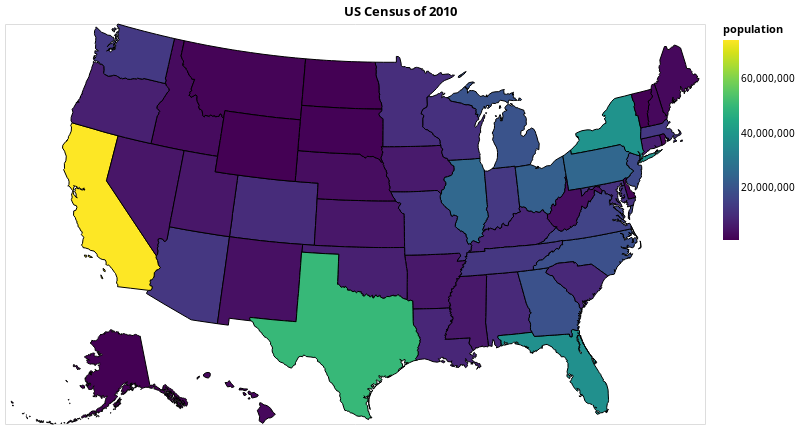

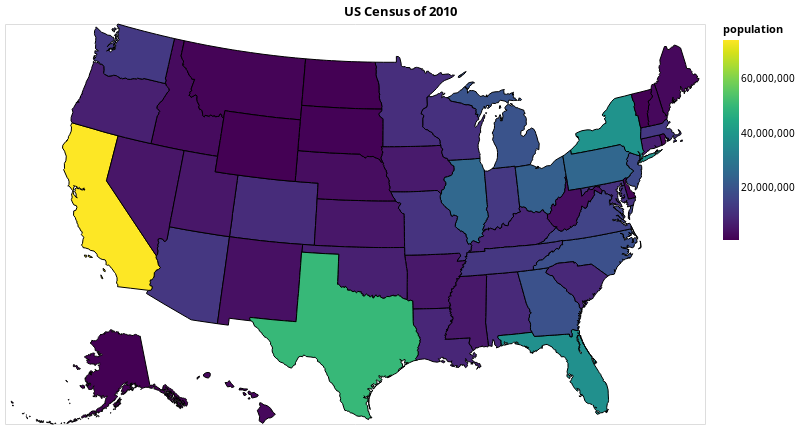

In [187]:
show_map(retrieve_census(), 2010)

In [173]:
retrieve_census()

[{'name': 'Alabama', 'id': 1, 'population': 9539064},
 {'name': 'Alaska', 'id': 2, 'population': 1383552},
 {'name': 'Arizona', 'id': 4, 'population': 12770166},
 {'name': 'Arkansas', 'id': 5, 'population': 5829140},
 {'name': 'California', 'id': 6, 'population': 74353114},
 {'name': 'Colorado', 'id': 8, 'population': 10029304},
 {'name': 'Connecticut', 'id': 9, 'population': 7143286},
 {'name': 'Delaware', 'id': 10, 'population': 1791626},
 {'name': 'District of Columbia', 'id': 11, 'population': 1203836},
 {'name': 'Florida', 'id': 12, 'population': 37548014},
 {'name': 'Georgia', 'id': 13, 'population': 19308558},
 {'name': 'Hawaii', 'id': 15, 'population': 2648878},
 {'name': 'Idaho', 'id': 16, 'population': 3132506},
 {'name': 'Illinois', 'id': 17, 'population': 25614224},
 {'name': 'Indiana', 'id': 18, 'population': 12970276},
 {'name': 'Iowa', 'id': 19, 'population': 6096578},
 {'name': 'Kansas', 'id': 20, 'population': 5675718},
 {'name': 'Kentucky', 'id': 21, 'population': 865

In [15]:
def load_data():
    """
    Load data from sc-est2017-agesex-civ.csv
    """
    import csv

    with open('sc-est2017-agesex-civ.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)

        # 999 means total of all age group
        census = list(filter(lambda x: x['NAME'] != 'United States' and x['AGE'] != '999', reader))
        return census

def population_by_year(year=2010, census=None):
    """
    Filters through census dataset and returns the list by year of data
    """

    if census is None:
        return None

    key = 'POPEST{}_CIV'.format(year)

    states = {}

    for row in census:
        state = row['STATE']

        if state not in states:
            states[state] = {'name': row['NAME'], 'id': int(row['STATE']), 'population': 0}

        states[state]['population'] += int(row[key])

    return list(states.values())

def filter_state(year, state, census=None):
    """
    Filters through the census data by year and state
    """
    if census is None:
        return None

    key = 'POPEST{}_CIV'.format(year)

    data = list(filter(lambda x: str(x['STATE']) == str(state) and
                       int(x['AGE']) != 999, census))

    age = {}

    for row in data:

        if row['AGE'] not in age:
            age[row['AGE']] = {'age': row['AGE'], 'population': 0}
        age[row['AGE']]['population'] += int(row[key])

    return list(age.values())

def show_bar(census):
    """
    Create a bar chart that shows the age group of the specific state
    """

    import altair as alt

    bars = alt.Chart(alt.Data(values=census)).mark_bar().encode(
        x='population:Q',
        y=alt.Y(
            'age:N',
            sort=alt.EncodingSortField(
                field='population',
                op='sum',
                order='descending'
            )
        ),
        color=alt.Color('population:Q')
    )

    return bars

data = load_data()

census = filter_state(2010, 1, data)

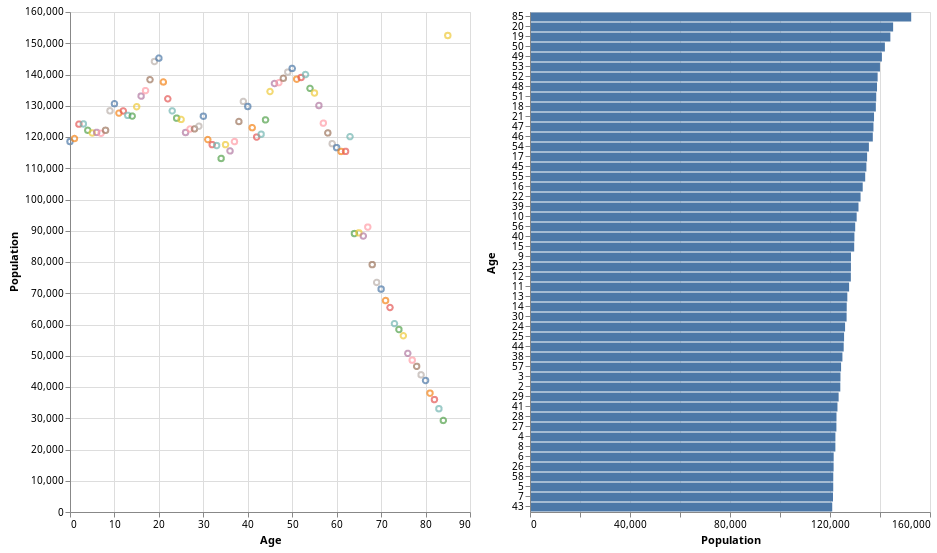

In [45]:
def filter_state(year, state, census=None):
    """
    Filters through the census data by year and state
    """
    if census is None:
        return None

    key = 'POPEST{}_CIV'.format(year)

    data = list(filter(lambda x: str(x['STATE']) == str(state) and
                       int(x['AGE']) != 999, census))

    age = {}

    for row in data:

        if row['AGE'] not in age:
            age[row['AGE']] = {'Age': int(row['AGE']), 'Population': 0}
        age[row['AGE']]['Population'] += int(row[key])

    return list(age.values())

def show_scatter(census):
    """
    Create a scatter plot that shows the age group of the specific state
    """
    import altair as alt

    source = alt.Data(values=census)

    brush = alt.selection_interval(encodings=['x'])

    scatter = alt.Chart().mark_point().encode(
        alt.X('Age:Q'),
        alt.Y('Population:Q'),
        color=alt.condition(brush, 'Age:N', alt.value('lightgray'), legend=None)
    ).properties(
        width=400,
        height=500
    ).add_selection(
        brush
    )
    
    bars = alt.Chart().mark_bar().encode(
        x='Population:Q',
        y=alt.Y(
            'Age:N',
            sort=alt.EncodingSortField(
                    field="Population",  # The field to use for the sort
                    op="max",  # The operation to run on the field prior to sorting
                    order="descending"  # The order to sort in
                )
        ),
        tooltip=['Population:Q']
    ).properties(
        title='',
        width=400,
        height=500
    ).transform_filter(
        brush
    ).transform_window(
        window=[{'op': 'rank', 'as': 'rank'}],
        sort=[{'field': 'Population', 'order': 'descending'}]
    ).transform_filter('datum.rank <= 50')

    return alt.hconcat(scatter, bars, data=source)

data = load_data()
show_scatter(filter_state(2010, 1, data))

pandas.core.frame.DataFrame